In [1]:
import sys
import os

# # Go up one level and then into src
# src_path = os.path.abspath(os.path.join("..", "src"))
# print("Adding to sys.path:", src_path)
# sys.path.insert(0, src_path)

# Add root dir to sys.path
import sys
from pathlib import Path

# print(Path.cwd().parent)
sys.path.append(str(Path.cwd().parent))  # or adjust as needed

import numpy as np
from src.utils.activations import sigmoid, relu, tanh
from src.utils.loss_functions import binary_cross_entropy
from src.utils.derivatives import diff_binary_cross_entropy

activation_funcs = {
    "sigmoid": sigmoid,
    "relu": relu,
    "tanh": tanh
}


In [11]:
# sys.path

In [3]:
layers = []
layers.append(np.zeros(3))
layers.append(np.zeros(2))
layers.append(np.zeros(2))
layers.append(np.zeros(1))

In [4]:
a_f = ["sigmoid", "sigmoid", "sigmoid"]

In [5]:
layers

[array([0., 0., 0.]), array([0., 0.]), array([0., 0.]), array([0.])]

In [6]:
from utils.parameters_init import xavier_init

shape = [(layers[i+1].shape[0], layers[i].shape[0]) for i in range(len(layers)-1)]
weights = [xavier_init(i) for i in shape]
biases = [xavier_init((i[0],)) for i in shape]

In [7]:
shape

[(2, 3), (2, 2), (1, 2)]

In [8]:
weights

[array([[-0.39342589, -0.83212088, -0.86823405],
        [ 0.01744419, -0.33931541, -1.0614814 ]]),
 array([[-0.57651914,  0.79572207],
        [-0.19154693,  0.77534064]]),
 array([[-0.49843523,  0.38230388]])]

In [9]:
biases

[array([ 0.53075375, -0.6326686 ]),
 array([-0.43189567, -0.09908905]),
 array([-0.95434293])]

In [18]:
for i, j in zip(weights, biases):
    print((i.shape, j.shape))

((2, 3), (2,))
((2, 2), (2,))
((1, 2), (1,))


In [23]:
np.array([1, 2]).shape

(2,)

In [44]:
for i in range(len(layers)-1):
    layers[i+1] = weights[i] @ layers[i] + biases[i]
    ac_func = activation_funcs[a_f[i]]
    layers[i+1] = ac_func(layers[i+1])

In [45]:
layers

[array([0., 0., 0.]),
 array([0.37761267, 0.33082915]),
 array([0.3713217 , 0.69279308]),
 array([0.05418484])]

In [43]:
ac_func = activation_funcs[a_f[1]]
ac_func

<function utils.activations.sigmoid(x)>

In [39]:
list(activation_funcs.values())[0]

<function utils.activations.sigmoid(x)>

In [23]:
biases[1]

array([-0.26006705,  0.9547276 ])

In [22]:
sigmoid(biases[1])

array([0.43534722, 0.72206494])

In [29]:
a= 1 / (1 + np.exp( - (np.array([5.97529062]))))

In [33]:
a == 0.997465675536554

array([ True])

In [25]:
- np.array([7, 8])

array([-7, -8])

In [25]:
import math
1 / (1 + math.exp(-0.954776))

0.7220746551277553

In [14]:
tr_data = np.array([[1, 2, 3]])
tr_data.T

array([[1],
       [2],
       [3]])

In [ ]:
diff_binary_cross_entropy(np.array([[0.997465675536554]]), np.array([[1]]))

ans = array([[-1.00254076]])

array([[-1.00254076]])

In [1]:
import numpy as np
np.random.seed(0)
n_samples = 100

# Class 0: centered around (0,0)
X0 = np.random.randn(2, n_samples) * 0.5 + np.array([[0], [0]])
y0 = np.zeros((1, n_samples))

# Class 1: centered around (2,2)
X1 = np.random.randn(2, n_samples) * 0.5 + np.array([[2], [2]])
y1 = np.ones((1, n_samples))

# Combine
tr_X = np.concatenate([X0, X1], axis=1)  # shape (2, 200)
tr_y = np.concatenate([y0, y1], axis=1)  # shape (1, 200)

In [7]:
np.random.randn(2, n_samples) *.5

array([[-7.75214673e-01,  2.08659411e-01, -4.72184245e-01,
         1.19051574e-01, -7.02981458e-01, -2.95028823e-01,
        -5.52447025e-02, -8.30349906e-01,  5.75739366e-02,
        -1.89573781e-01, -8.71178099e-01, -6.51621377e-01,
         3.02560042e-01,  4.47777993e-01, -6.59543199e-02,
         2.02380906e-01,  1.11921782e-01,  1.64811491e-01,
         6.42992004e-01, -7.53499199e-01,  3.38230366e-01,
        -1.91004478e-01, -1.12129467e-01, -1.51124865e-01,
        -1.87573558e-01, -6.13098096e-01,  9.16695996e-02,
         8.35471516e-01, -2.80665102e-02, -6.92521368e-04,
        -3.43649519e-01, -5.87372732e-02,  2.33083213e-01,
        -1.85121220e-01, -2.26902021e-01,  2.01632270e-01,
        -4.59002385e-01,  1.26248314e-01,  4.10160899e-01,
         6.79974271e-01, -4.51910036e-02,  6.83798620e-01,
         5.17204943e-01, -4.98106320e-01, -6.08969256e-01,
        -1.52481819e-01,  5.14467746e-01, -3.61435038e-02,
        -3.00328779e-01,  7.76121590e-01,  1.43452244e-0

In [5]:
X0.shape

(2, 100)

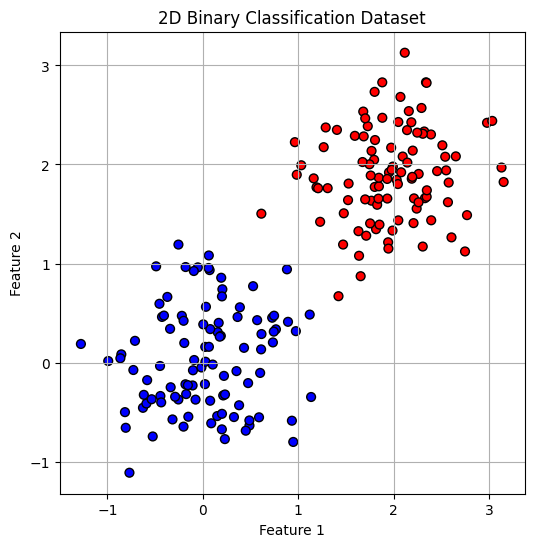

In [2]:
import matplotlib.pyplot as plt

# Assume tr_X.shape = (2, 200) and tr_y.shape = (1, 200)
x = tr_X[0, :]  # First feature (x-axis)
y = tr_X[1, :]  # Second feature (y-axis)
labels = tr_y[0, :]  # Labels: 0 or 1

# Scatter plot with color by label
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=labels, cmap='bwr', edgecolor='k', s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Binary Classification Dataset")
plt.grid(True)
plt.show()


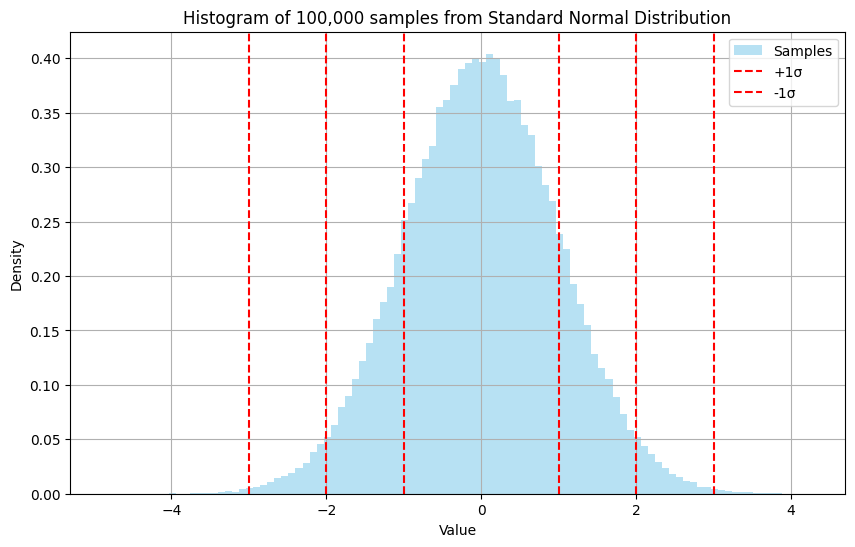

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100,000 samples from N(0,1)
samples = np.random.randn(100000)

plt.figure(figsize=(10,6))
plt.hist(samples, bins=100, density=True, alpha=0.6, color='skyblue', label='Samples')

# Plot lines for ±1σ, ±2σ, ±3σ
for sigma in [1, 2, 3]:
    plt.axvline(x=sigma, color='r', linestyle='--', label=f'+{sigma}σ' if sigma == 1 else "")
    plt.axvline(x=-sigma, color='r', linestyle='--', label=f'-{sigma}σ' if sigma == 1 else "")

plt.title('Histogram of 100,000 samples from Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import pandas as pd
from pathlib import Path
import os
import random

# resolve paths
# curr_script = Path(__file__)
curr_script = Path.cwd()
curr_folder = curr_script.parent
data_folder = curr_folder / "data"
data_content = data_folder / "data_to_test"

In [23]:
os.listdir(data_content)

['binary_classification_data.csv']

In [24]:
df = pd.read_csv(data_content / "binary_classification_data.csv")
df = df.iloc[:, 1:4]
df.head()

,x_0,x_1,y
0,0.882026,0.941575,0.0
1,0.200079,-0.673880,0.0
2,0.489369,-0.635242,0.0
3,1.120447,0.484698,0.0
4,0.933779,-0.586562,0.0


In [33]:
df.shape[0]+1

201

In [44]:
random_list = random.sample(range(0, df.shape[0]), df.shape[0])
len(random_list)


200

In [ ]:
df.index.sort_values()

RangeIndex(start=0, stop=200, step=1)

In [25]:
random.randint(1, 5)

4

In [ ]:
random_list = random.sample(range(0, 101), 100)

In [28]:
len(a)

100

In [45]:
df

,x_0,x_1,y
0,0.882026,0.941575,0.0
1,0.200079,-0.673880,0.0
2,0.489369,-0.635242,0.0
3,1.120447,0.484698,0.0
4,0.933779,-0.586562,0.0
...,...,...,...
195,2.568446,1.619254,1.0
196,2.048862,2.428962,1.0
197,2.291477,2.570551,1.0
198,1.800275,2.733289,1.0


In [46]:
df.loc[random_list]

,x_0,x_1,y
95,0.353287,-0.085773,0.0
139,2.338454,2.829775,1.0
50,-0.447733,-0.034121,0.0
168,1.844557,1.866133,1.0
19,-0.427048,0.461103,0.0
...,...,...,...
175,1.804523,2.246918,1.0
196,2.048862,2.428962,1.0
114,1.527777,1.807560,1.0
33,-0.990398,0.015915,0.0


In [42]:
random_list

[159,
 26,
 19,
 113,
 55,
 70,
 15,
 191,
 117,
 78,
 56,
 3,
 11,
 172,
 126,
 141,
 182,
 48,
 130,
 49,
 116,
 136,
 90,
 60,
 31,
 175,
 97,
 30,
 161,
 176,
 129,
 167,
 146,
 59,
 64,
 165,
 83,
 46,
 41,
 5,
 181,
 199,
 200,
 18,
 74,
 14,
 120,
 135,
 128,
 42,
 1,
 69,
 75,
 84,
 53,
 38,
 168,
 160,
 108,
 107,
 12,
 147,
 103,
 192,
 35,
 61,
 148,
 17,
 71,
 138,
 80,
 2,
 104,
 66,
 63,
 100,
 40,
 99,
 188,
 7,
 158,
 195,
 155,
 44,
 21,
 50,
 157,
 101,
 124,
 143,
 79,
 4,
 140,
 94,
 93,
 186,
 197,
 137,
 16,
 166,
 198,
 149,
 154,
 115,
 189,
 52,
 111,
 163,
 77,
 24,
 37,
 153,
 95,
 57,
 170,
 9,
 132,
 194,
 156,
 127,
 76,
 85,
 180,
 118,
 164,
 187,
 134,
 184,
 185,
 152,
 178,
 25,
 68,
 131,
 81,
 28,
 65,
 62,
 109,
 98,
 86,
 145,
 171,
 88,
 45,
 114,
 144,
 96,
 177,
 174,
 82,
 58,
 51,
 179,
 105,
 91,
 27,
 33,
 67,
 106,
 6,
 151,
 112,
 142,
 73,
 22,
 193,
 119,
 183,
 10,
 54,
 32,
 173,
 34,
 13,
 87,
 23,
 122,
 36,
 133,
 196,
 29,
 139,
 

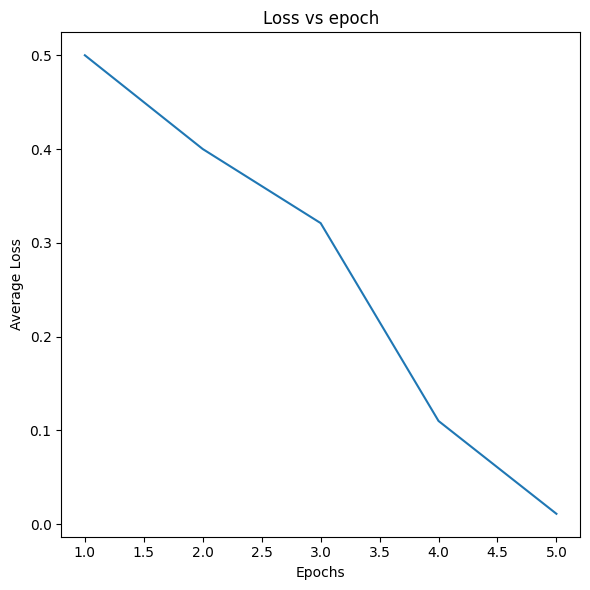

In [49]:
import matplotlib.pyplot as plt
epoch = [1, 2, 3, 4, 5]
loss_epoch_avg = [0.5, 0.4, 0.321, 0.11, 0.011]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(epoch, loss_epoch_avg)
ax.set_title("Loss vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("Average Loss")
plt.tight_layout()
plt.show()